## **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   **NÚMERO DE EQUIPO:**
*     Equipo #83

---        
        
*   **MIEMBROS DEL EQUIPO:**
*     Ernesto Damián Favela Vela: A00738581
*     Gustavo Alejandro Garduño Macedo: A01795341
*     Julia Gabriela Pinedo: A01795315
*     Juan Manuel Rodríguez Mateos: A01794890

--- 

In [1]:
# Importar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
insurance_df = pd.read_csv('../data/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [3]:
# *************************** PARTE 0: Clasificación de estadísticas *****************************

# Opcional: Se creará una función para etiquetar las variables de acuerdo con la categoría a la 
# que pertenecen, para visualizarlos en una tabla.

def separate_variables_by_type(df):
    """
    Separar las columnas entre numéricas (dtype= int, float) y cualitativas (dtype= object)
    
    Args:
        df (DataFrame)
    
    Returns:
        numeric_df (tabla impresa clasificando a las variables numéricas)
        object_df (tabla impresa clasificando a las variables categóricas)
    """
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Se declara una lista vacía, la cual se utilizará para almacenar los datos en el dataframe
    # que se generará
    data_types = []
    
    # Ciclo "for" obtener los data types de cada una de las columnas
    for col in df.columns:
        if col in numeric_columns:
            data_type = "Numeric" # Etiqueta para el tipo "numérico"
        elif col in object_columns:
            data_type = "Object" # Etiqueta para el tipo "objeto"
        data_types.append((col, data_type)) # Guarda las etiquetas de las columnas en la lista
    
    # Crea un DataFrame para las columnas numéricas
    numeric_df = pd.DataFrame([i for i in data_types if i[1] == "Numeric"],
                                   columns=["Variable", "Categoría"])
    # Crea un DataFrame para las columnas de texto 
    object_df = pd.DataFrame([i for i in data_types if i[1] == "Object"],
                                  columns=["Variable", "Categoría"])
    
    # Imprimir las tablas con los datos
    print('Columnas del tipo "Numeric":')
    print(tabulate(numeric_df, headers="keys", tablefmt="psql", showindex=True))
    print('\n\n')
    print('Columnas del tipo "Object":')
    print(tabulate(object_df, headers="keys", tablefmt="psql", showindex=True))

In [4]:
# Se imprimen las columnas separadas por categoría.

columns_separated = separate_variables_by_type(df=insurance_df)

Columnas del tipo "Numeric":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | age        | Numeric     |
|  1 | bmi        | Numeric     |
|  2 | children   | Numeric     |
|  3 | charges    | Numeric     |
+----+------------+-------------+



Columnas del tipo "Object":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | sex        | Object      |
|  1 | smoker     | Object      |
|  2 | region     | Object      |
+----+------------+-------------+


In [5]:
# Antes de generar las estadísticas descriptivas, es necesario realizar un análisis en las variables
# clasificadas como "Numéricas" y "Categóricas".

# Primero, para las variables numéricas:

# 1) age: es correctamente clasificada como numérica, debido a que la edad es un tipo de variable
# cuantitativa continua.
# 2) BMI: es correctamente clasificada como numérica, pues puede tomar un rango amplio de valores
# numéricos, incluyendo decimales (se calcula con el peso y altura de una persona).
# 3) número de hijos: es correctamente clasificada como numérica, sin embargo, es un tipo de 
# variable cuantitativa discreta; por lo que su análisis posterior sería más adecuado mediante
# gráficos de barra.
# 4) charges: los cargos realizados son una variable cuantitativa continua, debido a que éstos
# pueden variar pues no están restringidos a una cantidad única.

# Para las variables categóricas:

# 1) sex: es correctamente clasificaada como cualitativa, ya que representa dos categorías distintas.
# Se podría decir que es una variable cualitativa nominal.
# 2) smoker: esta variable es cualitativa nominal debido a que no existe un orden de clasificación
# implícito.
# 3 region: es correctamente clasificada como cualitativa, en específico, cualitativa nominal, debido
# a que solo representa categorías sin un orden específico o ranking.

# Al tener estas conclusiones, se procederá con la obtención de las estadísticas descriptivas.

In [6]:
# ****************************** PARTE 1: Resumen de estadísticas ********************************

"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se declara la función ".describe()" para obtener los datos estadísticos de las columnas que 
# se clasificaron como "numéricas".

num_columns = insurance_df.select_dtypes(include=['int', 'float']).columns

numerical_summary = insurance_df[num_columns].describe()
numerical_summary.T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
"""Estadísticas descriptivas para las variables categóricas del DataFrame"""

# Se obtienen los datos estadísticos de las columnas clasificadas como "categóricas".

obj_columns = insurance_df.select_dtypes(include=['object']).columns

object_summary = insurance_df[obj_columns].describe()
object_summary.T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
# ***************************** PARTE 1.1: Análisis de "children" *******************************

# Como se concluyó anteriormente, la variable "children" es del tipo cuantitativo discreto. Esta
# variable podría transformarse en "objeto" por la naturaleza de la misma, por ejemplo, para 
# interpretar los datos, para análisis y visualizaciones. Sin embargo, dados los requerimientos de
# la actividad, se conservarán sus propiedades numéricas para facilitar el uso de operaciones
# matemáticas en puntos posteriores. Se transformará la variable en "objeto" sin afectar al DF
# original y para visualizar su análisis estadístico únicamente.

children_as_obj = insurance_df.copy() # Copia para no afectar el DataFrame original

# Se transforma la columna a objeto
children_as_obj['children'] = children_as_obj['children'].astype('object')

# Se selecciona únicamente esa columna
children_as_obj = children_as_obj['children']
children_as_obj

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: object

In [9]:
# Estadísticas descriptivas para "children" como 'object' type

children_as_obj_summary = children_as_obj.describe()
children_as_obj_summary.T

count     1338
unique       6
top          0
freq       574
Name: children, dtype: int64

1b) Búsqueda de valores faltantes.

In [10]:
# ************************** PARTE 1: Porcentaje de Valores Faltantes ****************************

# Opcional: Se creará una función para obtener automáticamente el porcentaje de valores faltantes 
# por cada variable del DataFrame.

def find_missing_values_per_column(df):
    """
    Obtener el porcentaje de valores faltantes por columna e imprimirlo en una tabla
    
    Args:
        df (DataFrame)
    
    Returns:
        df_missing (tabla impresa con los porcentajes de valores faltantes por columna)
    """
    missing_percentage = df.isna().sum() * 100 / len(df)

    # Guardar en un DataFrame para su impresión en una tabla
    
    df_missing = pd.DataFrame({
        'Columna': df.columns,
        'Porcentaje Faltantes': missing_percentage.astype(str) + '%'
        # Imprime el valor con el símbolo "%"
    })
    
    # Imprimir una tabla con los datos
    print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

In [11]:
# Se imprime la tabla de valores faltantes.

missing_values = find_missing_values_per_column(df=insurance_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| age       | 0.0%                   |
| sex       | 0.0%                   |
| bmi       | 0.0%                   |
| children  | 0.0%                   |
| smoker    | 0.0%                   |
| region    | 0.0%                   |
| charges   | 0.0%                   |
+-----------+------------------------+


In [13]:
# Se observa que ninguna columna posee valores faltantes, por lo que no es necesario
# descartar o imputar algún valor, debido a que el DataFrame ya se encuentra completo.

1c) Histogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

In [12]:
# ******************* PARTE 0: Creación de funciones para obtener gráficas ***********************

# Se creará una función para obtener los histogramas de determinadas columnas de manera automática.

def print_histogram_and_boxplot_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de los histogramas y boxplots
    """      
    # Crear una figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Calcular la moda, mediana y media de cada columna
    mode_hist = df[column_name].mode() 
    median_hist = df[column_name].median()
    mean_hist = df[column_name].mean()

    # Graficar el histograma en el primer subplot
    sns.histplot(data=df, x=column_name, ax=ax1, kde=True, color='skyblue')
    ax1.set_title(f'Histograma de la columna "{column_name}"')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar moda
    ax1.axvline(mode_hist[0], color='green', linestyle='--', linewidth=2, label='Moda')
    # Mostrar mediana
    ax1.axvline(median_hist, color='red', linestyle='-', linewidth=2, label='Mediana')
    # Mostrar media
    ax1.axvline(mean_hist, color='blue', linestyle='--', linewidth=2, label='Media')
    ax1.legend()
    
    # Graficar el boxplot en el segundo subplot
    sns.boxplot(data=df, x=column_name, ax=ax2, color='#f7dcf6')
    ax2.set_title(f'Boxplot de la columna "{column_name}"')
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Ajustar espacio
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()

In [13]:
# Se creará una función para obtener las barras de determinadas columnas de manera automática.

def print_graph_bars_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de las barras
    """
    # Crear un subplot
    fig, ax = plt.subplots()
    
    # Graficar las barras en el subplot
    sns.countplot(x=df[column_name], data=df)
    ax.set_title(f'Barras de la columna {column_name}')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustar espacio
    plt.tight_layout()
    
    # Mostrar las gráficas
    plt.show()

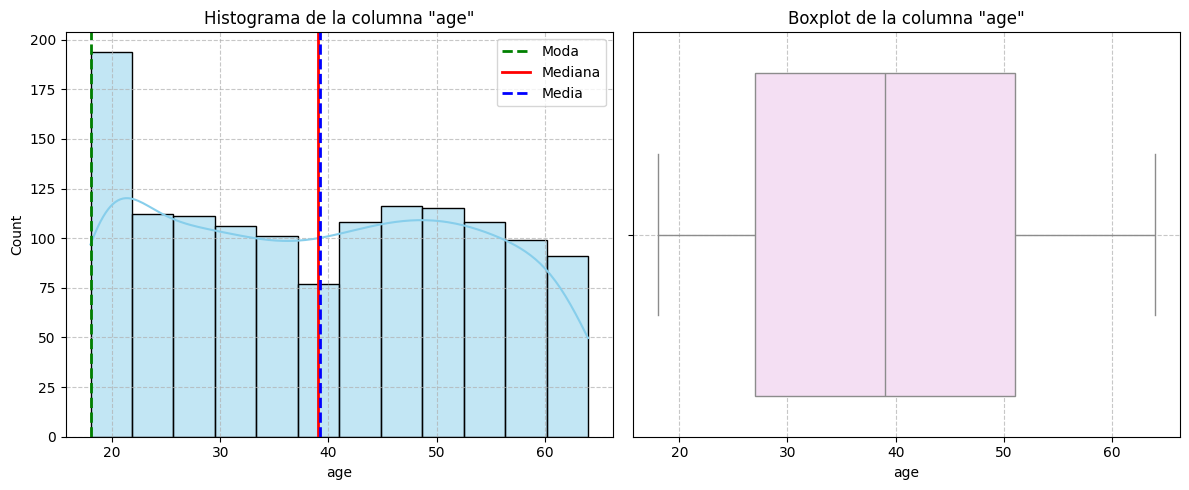

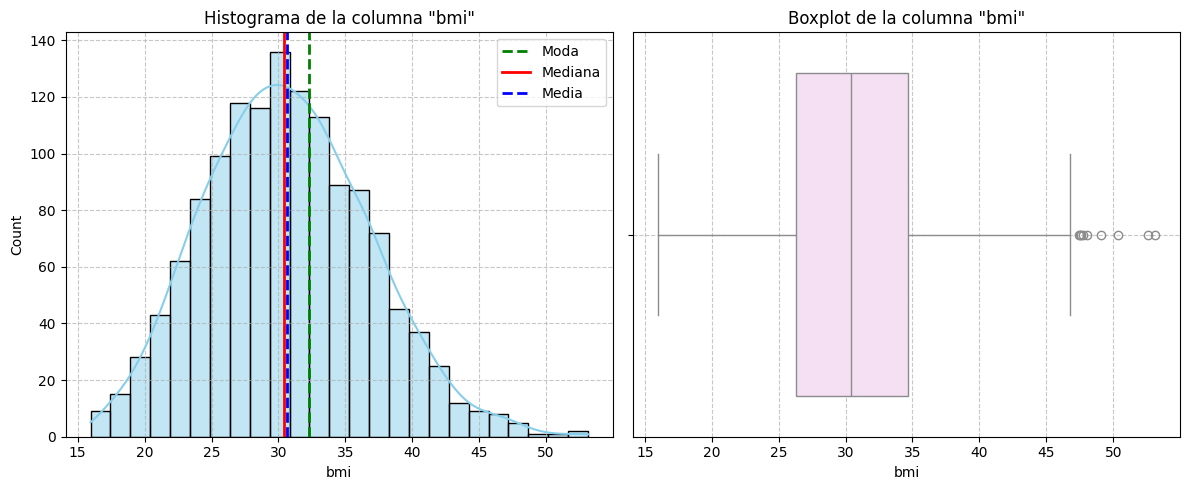

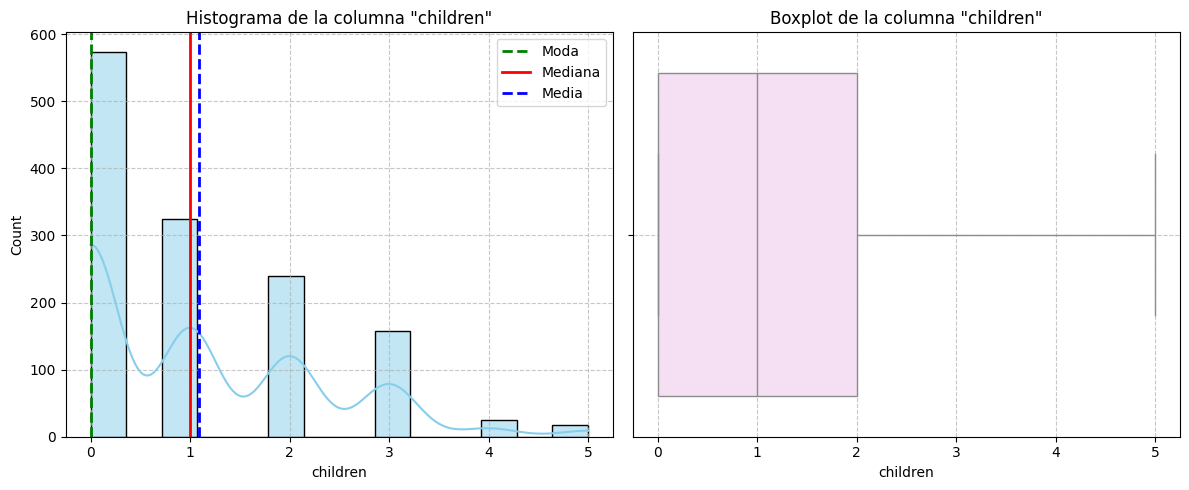

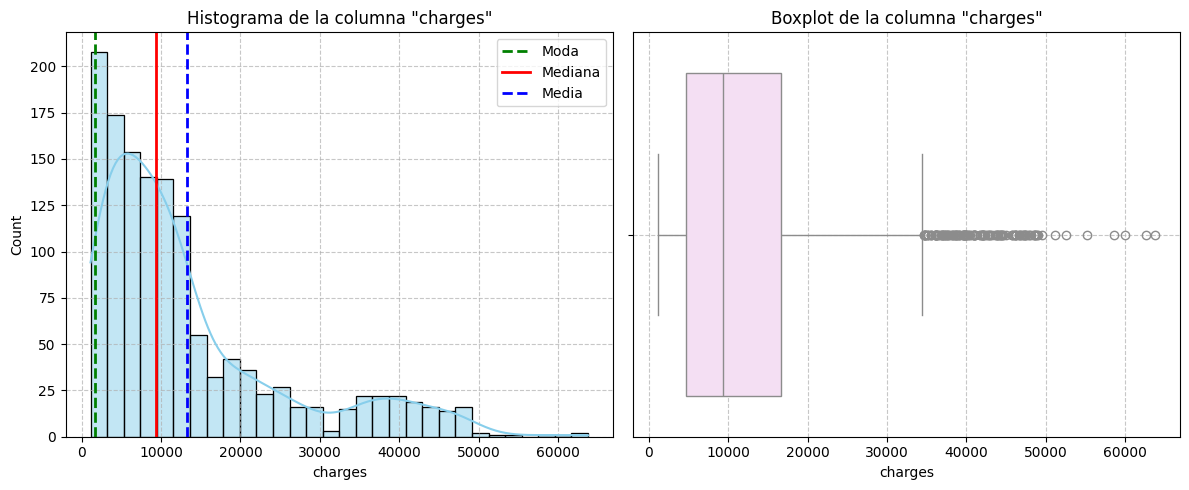

In [14]:
"""Imprimir Histogramas y Boxplots para columnas numéricas"""

# num_columns: anteriormente definida

for column_name in num_columns:
    print('\n')
    print_histogram_and_boxplot_per_column(df=insurance_df, column_name=column_name)

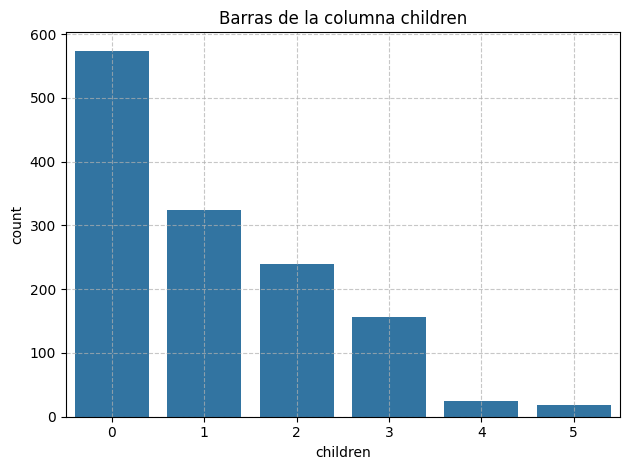

In [15]:
# Se observa que para la columna "children", al ser numérica discreta, sería conveniente
# la obtención de un gráfico de barras para realizar un mejor análisis de los datos.

print_graph_bars_per_column(df=insurance_df, column_name='children')

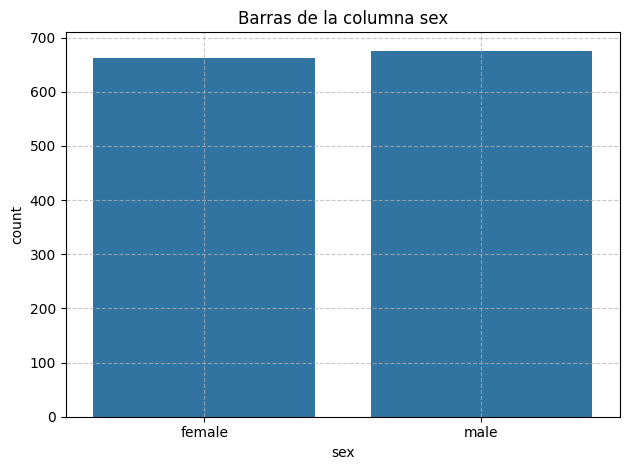

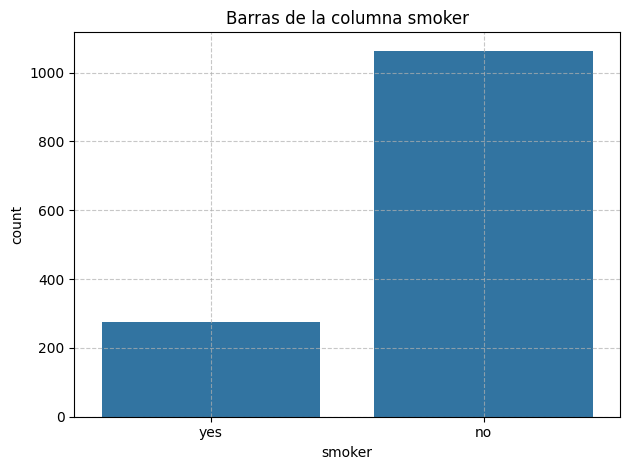

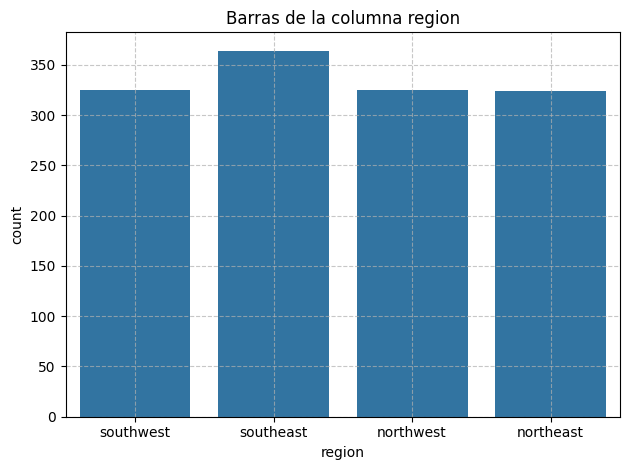

In [16]:
"""Imprimir Gráficas de Barras para columnas object"""

# obj_columns: anteriormente definida

for column_name in obj_columns:
    print('\n')
    print_graph_bars_per_column(df=insurance_df, column_name=column_name)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

<Axes: xlabel='charges', ylabel='sex'>

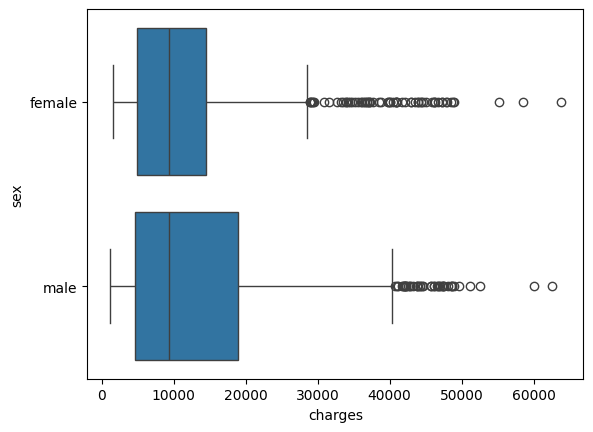

In [20]:
sns.boxplot(data=insurance_df, x='charges', y='sex')

- Las sexo son mas valores éxtremos para los hombres a comparación de las mujeres.
- La mediana de las primas entre hombres y mujeres es la misma

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

<Axes: xlabel='bmi', ylabel='charges'>

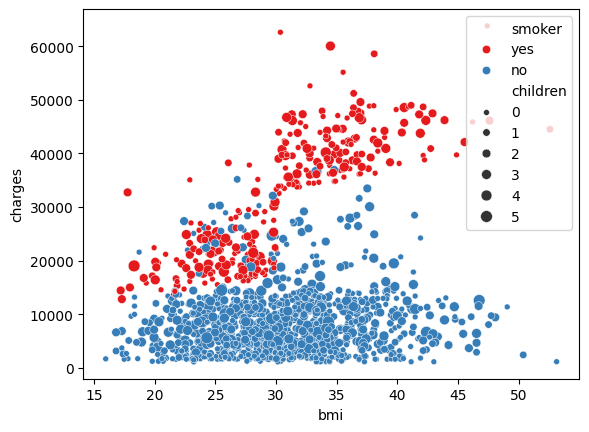

In [21]:
sns.scatterplot(y = "charges", x = "bmi", data = insurance_df, hue = "smoker", palette = "Set1", size = "children")

- Al parecer el valor de las prima varía de acuerdo a si la persona fuma o no, resultando en una interación entre el predictor y la variable de salida.
- Además al parecer la corelación entre las primas y el bmi es positiva. A mayor bmi, mayor prima. Esto mas marcado en fumadores.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

<Axes: >

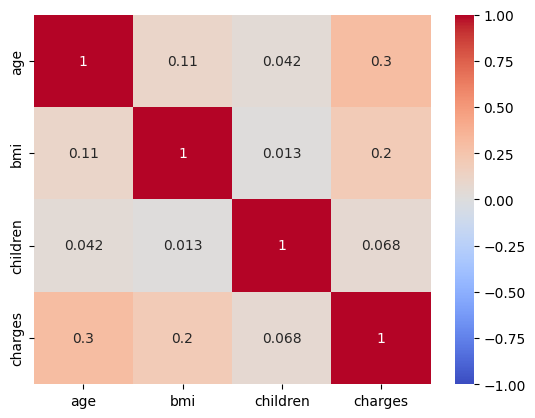

In [23]:
# Make a correlation heatmap for the data in a range of -1 to 1
corr = insurance_df[num_columns].corr()
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [17]:
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1,stratify=insurance_df['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

print(num_columns)
print(obj_columns)


numeric_features = num_columns
numeric_transformer = MinMaxScaler()

categorical_features = obj_columns
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

regressor = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.